# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ<br><br>パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>Logistic Sigmoid をアクティベーション関数として<br>持つパーセプトロンを用いて作成せよ。<br><br>パーセプトロンのパラメータの調整には平均二乗誤差と最急降下法を用いること。<br><br>また、調整済みのパラメータを保存し、作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<img src="images/perceptron.png"  height="50%" width="50%" align="left">

用意するデータ  
入力データ = np.array([ , , , , , , ])  
正解データ = np.array([ , , , , , , ])


入力層(式) y も[ , , , , , ,]   
$
y= a*[ , , , , ,...] + b
$

中間層(シグモイド関数: a=1とする) Sも [ , , , , , ,]  
$ 
S = \frac{1}{1-e^-y}  
$

誤差関数(平均二乗誤差)  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  

- 誤差関数(平均二乗誤差)  

z = 真の値  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測値 - z_i)^2
$  

パラメータ a は、0.00....など1次元  
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -z_i)^2}
$



- 最急降下法  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-z_i)^2}{d  a}
$  
- パラメータaの微分式  
$
a^(k+1) = a^(k) -v\frac{1}{n}\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-z_i)*a*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))*2
$
- バイアスbの微分式  
$
b^(k+1) =  b^(k) -v\frac{1}{n}\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-z_i)*b*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))*2
$

<img src="images/NN_1.png" height="100%" width="100%" align="left">

mean_squared_error :  0.3285819780524566
mean_squared_error :  0.3266901410289573
mean_squared_error :  0.32485389051028657
mean_squared_error :  0.3230725315087606
mean_squared_error :  0.32134522465380305
mean_squared_error :  0.3196710074174049
mean_squared_error :  0.3180488139072797
mean_squared_error :  0.31647749313785406
mean_squared_error :  0.3149558257373896
mean_squared_error :  0.3134825390892015
mean_squared_error :  0.3120563209366556
mean_squared_error :  0.3106758315061302
mean_squared_error :  0.3093397142202593
mean_squared_error :  0.3080466050864209
mean_squared_error :  0.3067951408534541
mean_squared_error :  0.30558396603380666
mean_squared_error :  0.3044117388894906
mean_squared_error :  0.3032771364790038
mean_squared_error :  0.30217885885936835
mean_squared_error :  0.3011156325331079
mean_squared_error :  0.300086213224769
mean_squared_error :  0.29908938806580676
mean_squared_error :  0.2981239772605814
mean_squared_error :  0.29718883530005213
mean_squar

mean_squared_error :  0.2550034341859764
mean_squared_error :  0.25498996432516163
mean_squared_error :  0.25497656603538044
mean_squared_error :  0.2549632387520769
mean_squared_error :  0.25494998191657997
mean_squared_error :  0.25493679497602756
mean_squared_error :  0.25492367738329175
mean_squared_error :  0.25491062859690483
mean_squared_error :  0.2548976480809868
mean_squared_error :  0.25488473530517364
mean_squared_error :  0.2548718897445472
mean_squared_error :  0.2548591108795659
mean_squared_error :  0.2548463981959959
mean_squared_error :  0.25483375118484447
mean_squared_error :  0.2548211693422934
mean_squared_error :  0.2548086521696338
mean_squared_error :  0.25479619917320184
mean_squared_error :  0.2547838098643156
mean_squared_error :  0.2547714837592125
mean_squared_error :  0.25475922037898785
mean_squared_error :  0.2547470192495347
mean_squared_error :  0.25473487990148347
mean_squared_error :  0.2547228018701444
mean_squared_error :  0.25471078469544833
mean

mean_squared_error :  0.25283440232296395
mean_squared_error :  0.25283003634799744
mean_squared_error :  0.2528256837284761
mean_squared_error :  0.2528213444034516
mean_squared_error :  0.25281701831234454
mean_squared_error :  0.25281270539494205
mean_squared_error :  0.25280840559139484
mean_squared_error :  0.2528041188422145
mean_squared_error :  0.2527998450882707
mean_squared_error :  0.25279558427078863
mean_squared_error :  0.2527913363313464
mean_squared_error :  0.25278710121187203
mean_squared_error :  0.2527828788546415
mean_squared_error :  0.2527786692022753
mean_squared_error :  0.2527744721977368
mean_squared_error :  0.2527702877843289
mean_squared_error :  0.252766115905692
mean_squared_error :  0.25276195650580113
mean_squared_error :  0.2527578095289641
mean_squared_error :  0.25275367491981826
mean_squared_error :  0.25274955262332854
mean_squared_error :  0.2527454425847851
mean_squared_error :  0.25274134474980053
mean_squared_error :  0.252737259064308
mean_sq

mean_squared_error :  0.2519508806941873
mean_squared_error :  0.2519488043460712
mean_squared_error :  0.2519467323968178
mean_squared_error :  0.25194466483249855
mean_squared_error :  0.25194260163924387
mean_squared_error :  0.2519405428032423
mean_squared_error :  0.25193848831074045
mean_squared_error :  0.2519364381480427
mean_squared_error :  0.2519343923015105
mean_squared_error :  0.25193235075756293
mean_squared_error :  0.2519303135026756
mean_squared_error :  0.2519282805233805
mean_squared_error :  0.25192625180626604
mean_squared_error :  0.25192422733797654
mean_squared_error :  0.25192220710521174
mean_squared_error :  0.25192019109472713
mean_squared_error :  0.2519181792933328
mean_squared_error :  0.25191617168789393
mean_squared_error :  0.25191416826533014
mean_squared_error :  0.25191216901261504
mean_squared_error :  0.2519101739167764
mean_squared_error :  0.2519081829648956
mean_squared_error :  0.2519061961441072
mean_squared_error :  0.25190421344159925
mean

mean_squared_error :  0.2514020349194024
mean_squared_error :  0.25140096000365997
mean_squared_error :  0.2513998867306462
mean_squared_error :  0.2513988150966049
mean_squared_error :  0.2513977450977912
mean_squared_error :  0.25139667673047184
mean_squared_error :  0.2513956099909248
mean_squared_error :  0.25139454487543944
mean_squared_error :  0.2513934813803162
mean_squared_error :  0.2513924195018668
mean_squared_error :  0.25139135923641426
mean_squared_error :  0.25139030058029266
mean_squared_error :  0.25138924352984704
mean_squared_error :  0.2513881880814337
mean_squared_error :  0.2513871342314197
mean_squared_error :  0.25138608197618323
mean_squared_error :  0.2513850313121133
mean_squared_error :  0.25138398223561
mean_squared_error :  0.25138293474308393
mean_squared_error :  0.2513818888309568
mean_squared_error :  0.2513808444956609
mean_squared_error :  0.2513798017336392
mean_squared_error :  0.25137876054134567
mean_squared_error :  0.2513777209152443
mean_squa

mean_squared_error :  0.25109976710968707
mean_squared_error :  0.251099104877717
mean_squared_error :  0.25109844344121046
mean_squared_error :  0.25109778279873685
mean_squared_error :  0.2510971229488692
mean_squared_error :  0.251096463890184
mean_squared_error :  0.25109580562126094
mean_squared_error :  0.2510951481406833
mean_squared_error :  0.25109449144703755
mean_squared_error :  0.25109383553891385
mean_squared_error :  0.25109318041490536
mean_squared_error :  0.2510925260736088
mean_squared_error :  0.2510918725136243
mean_squared_error :  0.251091219733555
mean_squared_error :  0.2510905677320078
mean_squared_error :  0.25108991650759255
mean_squared_error :  0.2510892660589226
mean_squared_error :  0.2510886163846145
mean_squared_error :  0.25108796748328815
mean_squared_error :  0.2510873193535666
mean_squared_error :  0.2510866719940765
mean_squared_error :  0.2510860254034473
mean_squared_error :  0.25108537958031196
mean_squared_error :  0.2510847345233068
mean_squa

mean_squared_error :  0.2509453607666546
mean_squared_error :  0.25094487111937946
mean_squared_error :  0.25094438197820085
mean_squared_error :  0.2509438933423355
mean_squared_error :  0.2509434052110015
mean_squared_error :  0.25094291758341897
mean_squared_error :  0.25094243045880926
mean_squared_error :  0.2509419438363956
mean_squared_error :  0.25094145771540255
mean_squared_error :  0.25094097209505645
mean_squared_error :  0.2509404869745852
mean_squared_error :  0.25094000235321834
mean_squared_error :  0.2509395182301868
mean_squared_error :  0.25093903460472317
mean_squared_error :  0.250938551476062
mean_squared_error :  0.2509380688434385
mean_squared_error :  0.2509375867060904
mean_squared_error :  0.2509371050632565
mean_squared_error :  0.2509366239141773
mean_squared_error :  0.2509361432580948
mean_squared_error :  0.25093566309425247
mean_squared_error :  0.25093518342189536
mean_squared_error :  0.25093470424027037
mean_squared_error :  0.25093422554862543
mean_

mean_squared_error :  0.2507843517459653
mean_squared_error :  0.2507840144589579
mean_squared_error :  0.2507836774614992
mean_squared_error :  0.2507833407532167
mean_squared_error :  0.25078300433373885
mean_squared_error :  0.2507826682026944
mean_squared_error :  0.25078233235971314
mean_squared_error :  0.2507819968044251
mean_squared_error :  0.25078166153646114
mean_squared_error :  0.25078132655545293
mean_squared_error :  0.2507809918610323
mean_squared_error :  0.25078065745283223
mean_squared_error :  0.25078032333048583
mean_squared_error :  0.25077998949362723
mean_squared_error :  0.25077965594189094
mean_squared_error :  0.2507793226749125
mean_squared_error :  0.25077898969232726
mean_squared_error :  0.250778656993772
mean_squared_error :  0.25077832457888377
mean_squared_error :  0.25077799244730026
mean_squared_error :  0.2507776605986598
mean_squared_error :  0.25077732903260125
mean_squared_error :  0.2507769977487643
mean_squared_error :  0.250776666746789
mean_s

mean_squared_error :  0.2506781378839841
mean_squared_error :  0.2506778856497729
mean_squared_error :  0.25067763360290307
mean_squared_error :  0.2506773817431661
mean_squared_error :  0.25067713007035375
mean_squared_error :  0.2506768785842583
mean_squared_error :  0.2506766272846722
mean_squared_error :  0.250676376171388
mean_squared_error :  0.2506761252441989
mean_squared_error :  0.2506758745028984
mean_squared_error :  0.25067562394728005
mean_squared_error :  0.25067537357713787
mean_squared_error :  0.2506751233922661
mean_squared_error :  0.25067487339245953
mean_squared_error :  0.2506746235775128
mean_squared_error :  0.25067437394722114
mean_squared_error :  0.2506741245013804
mean_squared_error :  0.250673875239786
mean_squared_error :  0.2506736261622342
mean_squared_error :  0.25067337726852135
mean_squared_error :  0.2506731285584443
mean_squared_error :  0.25067288003179994
mean_squared_error :  0.2506726316883856
mean_squared_error :  0.25067238352799887
mean_squa

mean_squared_error :  0.2505895062286003
mean_squared_error :  0.25058931554963165
mean_squared_error :  0.2505891249938464
mean_squared_error :  0.2505889345611253
mean_squared_error :  0.2505887442513494
mean_squared_error :  0.25058855406439956
mean_squared_error :  0.25058836400015716
mean_squared_error :  0.2505881740585035
mean_squared_error :  0.25058798423932
mean_squared_error :  0.2505877945424884
mean_squared_error :  0.2505876049678907
mean_squared_error :  0.25058741551540864
mean_squared_error :  0.25058722618492446
mean_squared_error :  0.2505870369763204
mean_squared_error :  0.25058684788947894
mean_squared_error :  0.25058665892428256
mean_squared_error :  0.2505864700806142
mean_squared_error :  0.2505862813583565
mean_squared_error :  0.2505860927573926
mean_squared_error :  0.25058590427760574
mean_squared_error :  0.2505857159188792
mean_squared_error :  0.25058552768109643
mean_squared_error :  0.2505853395641411
mean_squared_error :  0.25058515156789707
mean_squ

mean_squared_error :  0.25052861020814843
mean_squared_error :  0.2505284568505365
mean_squared_error :  0.2505283035817982
mean_squared_error :  0.2505281504018563
mean_squared_error :  0.25052799731063374
mean_squared_error :  0.25052784430805336
mean_squared_error :  0.25052769139403863
mean_squared_error :  0.2505275385685123
mean_squared_error :  0.25052738583139794
mean_squared_error :  0.2505272331826187
mean_squared_error :  0.25052708062209805
mean_squared_error :  0.2505269281497597
mean_squared_error :  0.25052677576552695
mean_squared_error :  0.25052662346932375
mean_squared_error :  0.2505264712610738
mean_squared_error :  0.250526319140701
mean_squared_error :  0.25052616710812925
mean_squared_error :  0.25052601516328277
mean_squared_error :  0.2505258633060855
mean_squared_error :  0.2505257115364618
mean_squared_error :  0.2505255598543359
mean_squared_error :  0.2505254082596323
mean_squared_error :  0.25052525675227544
mean_squared_error :  0.25052510533218986
mean_

mean_squared_error :  0.2504830479392053
mean_squared_error :  0.250482919855014
mean_squared_error :  0.25048279183867184
mean_squared_error :  0.2504826638901251
mean_squared_error :  0.25048253600932
mean_squared_error :  0.25048240819620265
mean_squared_error :  0.2504822804507196
mean_squared_error :  0.25048215277281694
mean_squared_error :  0.25048202516244117
mean_squared_error :  0.2504818976195388
mean_squared_error :  0.2504817701440565
mean_squared_error :  0.2504816427359406
mean_squared_error :  0.25048151539513785
mean_squared_error :  0.25048138812159493
mean_squared_error :  0.2504812609152587
mean_squared_error :  0.2504811337760759
mean_squared_error :  0.25048100670399337
mean_squared_error :  0.25048087969895805
mean_squared_error :  0.25048075276091686
mean_squared_error :  0.25048062588981707
mean_squared_error :  0.25048049908560555
mean_squared_error :  0.2504803723482294
mean_squared_error :  0.250480245677636
mean_squared_error :  0.2504801190737725
mean_squa

mean_squared_error :  0.2504414770174038
mean_squared_error :  0.25044137001220657
mean_squared_error :  0.2504412630588283
mean_squared_error :  0.2504411561572312
mean_squared_error :  0.2504410493073781
mean_squared_error :  0.25044094250923105
mean_squared_error :  0.2504408357627527
mean_squared_error :  0.2504407290679056
mean_squared_error :  0.2504406224246523
mean_squared_error :  0.25044051583295546
mean_squared_error :  0.25044040929277755
mean_squared_error :  0.25044030280408147
mean_squared_error :  0.25044019636682974
mean_squared_error :  0.25044008998098527
mean_squared_error :  0.25043998364651077
mean_squared_error :  0.2504398773633691
mean_squared_error :  0.250439771131523
mean_squared_error :  0.25043966495093545
mean_squared_error :  0.2504395588215694
mean_squared_error :  0.25043945274338775
mean_squared_error :  0.25043934671635365
mean_squared_error :  0.2504392407404299
mean_squared_error :  0.25043913481557983
mean_squared_error :  0.25043902894176623
mean

mean_squared_error :  0.2504004111548651
mean_squared_error :  0.2504003231161693
mean_squared_error :  0.250400235116152
mean_squared_error :  0.2504001471547877
mean_squared_error :  0.250400059232051
mean_squared_error :  0.2503999713479164
mean_squared_error :  0.25039988350235864
mean_squared_error :  0.2503997956953522
mean_squared_error :  0.25039970792687183
mean_squared_error :  0.250399620196892
mean_squared_error :  0.2503995325053876
mean_squared_error :  0.2503994448523333
mean_squared_error :  0.2503993572377037
mean_squared_error :  0.2503992696614737
mean_squared_error :  0.250399182123618
mean_squared_error :  0.2503990946241114
mean_squared_error :  0.25039900716292873
mean_squared_error :  0.2503989197400448
mean_squared_error :  0.25039883235543453
mean_squared_error :  0.2503987450090728
mean_squared_error :  0.25039865770093445
mean_squared_error :  0.2503985704309944
mean_squared_error :  0.25039848319922775
mean_squared_error :  0.25039839600560926
mean_squared_

mean_squared_error :  0.2503762487779479
mean_squared_error :  0.250376171036233
mean_squared_error :  0.2503760933266167
mean_squared_error :  0.2503760156490792
mean_squared_error :  0.2503759380036006
mean_squared_error :  0.250375860390161
mean_squared_error :  0.2503757828087406
mean_squared_error :  0.25037570525931974
mean_squared_error :  0.2503756277418785
mean_squared_error :  0.2503755502563972
mean_squared_error :  0.25037547280285605
mean_squared_error :  0.2503753953812352
mean_squared_error :  0.25037531799151513
mean_squared_error :  0.25037524063367594
mean_squared_error :  0.2503751633076981
mean_squared_error :  0.25037508601356195
mean_squared_error :  0.25037500875124763
mean_squared_error :  0.2503749315207357
mean_squared_error :  0.25037485432200657
mean_squared_error :  0.2503747771550404
mean_squared_error :  0.25037470001981776
mean_squared_error :  0.25037462291631907
mean_squared_error :  0.2503745458445248
mean_squared_error :  0.2503744688044152
mean_squa

mean_squared_error :  0.25035860948748234
mean_squared_error :  0.2503585388592098
mean_squared_error :  0.25035846825873476
mean_squared_error :  0.2503583976860409
mean_squared_error :  0.2503583271411117
mean_squared_error :  0.2503582566239311
mean_squared_error :  0.2503581861344824
mean_squared_error :  0.2503581156727494
mean_squared_error :  0.2503580452387157
mean_squared_error :  0.25035797483236494
mean_squared_error :  0.2503579044536809
mean_squared_error :  0.25035783410264745
mean_squared_error :  0.2503577637792479
mean_squared_error :  0.25035769348346637
mean_squared_error :  0.2503576232152864
mean_squared_error :  0.25035755297469164
mean_squared_error :  0.2503574827616661
mean_squared_error :  0.25035741257619337
mean_squared_error :  0.2503573424182574
mean_squared_error :  0.2503572722878419
mean_squared_error :  0.2503572021849307
mean_squared_error :  0.2503571321095075
mean_squared_error :  0.2503570620615564
mean_squared_error :  0.2503569920410611
mean_squa

mean_squared_error :  0.25033628424885
mean_squared_error :  0.2503362221351454
mean_squared_error :  0.25033616004436854
mean_squared_error :  0.2503360979765067
mean_squared_error :  0.25033603593154746
mean_squared_error :  0.25033597390947787
mean_squared_error :  0.2503359119102854
mean_squared_error :  0.25033584993395724
mean_squared_error :  0.25033578798048095
mean_squared_error :  0.2503357260498439
mean_squared_error :  0.25033566414203334
mean_squared_error :  0.2503356022570367
mean_squared_error :  0.2503355403948414
mean_squared_error :  0.2503354785554348
mean_squared_error :  0.2503354167388044
mean_squared_error :  0.2503353549449374
mean_squared_error :  0.25033529317382164
mean_squared_error :  0.25033523142544417
mean_squared_error :  0.2503351696997927
mean_squared_error :  0.25033510799685454
mean_squared_error :  0.2503350463166171
mean_squared_error :  0.25033498465906817
mean_squared_error :  0.2503349230241949
mean_squared_error :  0.25033486141198497
mean_sq

mean_squared_error :  0.25032424392225666
mean_squared_error :  0.25032418617394725
mean_squared_error :  0.2503241284461927
mean_squared_error :  0.2503240707389819
mean_squared_error :  0.2503240130523039
mean_squared_error :  0.2503239553861478
mean_squared_error :  0.2503238977405026
mean_squared_error :  0.2503238401153576
mean_squared_error :  0.2503237825107015
mean_squared_error :  0.2503237249265236
mean_squared_error :  0.2503236673628129
mean_squared_error :  0.25032360981955853
mean_squared_error :  0.25032355229674974
mean_squared_error :  0.2503234947943753
mean_squared_error :  0.2503234373124246
mean_squared_error :  0.2503233798508867
mean_squared_error :  0.25032332240975075
mean_squared_error :  0.25032326498900576
mean_squared_error :  0.2503232075886411
mean_squared_error :  0.25032315020864576
mean_squared_error :  0.25032309284900894
mean_squared_error :  0.2503230355097198
mean_squared_error :  0.2503229781907675
mean_squared_error :  0.25032292089214125
mean_sq

mean_squared_error :  0.25030779489765353
mean_squared_error :  0.2503077428564453
mean_squared_error :  0.25030769083282256
mean_squared_error :  0.2503076388267764
mean_squared_error :  0.250307586838298
mean_squared_error :  0.25030753486737856
mean_squared_error :  0.250307482914009
mean_squared_error :  0.2503074309781804
mean_squared_error :  0.2503073790598841
mean_squared_error :  0.2503073271591111
mean_squared_error :  0.25030727527585245
mean_squared_error :  0.2503072234100994
mean_squared_error :  0.2503071715618431
mean_squared_error :  0.25030711973107467
mean_squared_error :  0.2503070679177853
mean_squared_error :  0.2503070161219661
mean_squared_error :  0.2503069643436082
mean_squared_error :  0.250306912582703
mean_squared_error :  0.25030686083924136
mean_squared_error :  0.25030680911321473
mean_squared_error :  0.25030675740461417
mean_squared_error :  0.2503067057134309
mean_squared_error :  0.25030665403965613
mean_squared_error :  0.25030660238328106
mean_squa

mean_squared_error :  0.250287609974984
mean_squared_error :  0.2502875645318862
mean_squared_error :  0.2502875191031391
mean_squared_error :  0.25028747368873594
mean_squared_error :  0.25028742828866996
mean_squared_error :  0.2502873829029344
mean_squared_error :  0.2502873375315223
mean_squared_error :  0.25028729217442713
mean_squared_error :  0.250287246831642
mean_squared_error :  0.25028720150316025
mean_squared_error :  0.2502871561889749
mean_squared_error :  0.2502871108890794
mean_squared_error :  0.2502870656034668
mean_squared_error :  0.25028702033213046
mean_squared_error :  0.25028697507506364
mean_squared_error :  0.25028692983225964
mean_squared_error :  0.2502868846037117
mean_squared_error :  0.25028683938941293
mean_squared_error :  0.25028679418935673
mean_squared_error :  0.2502867490035364
mean_squared_error :  0.2502867038319452
mean_squared_error :  0.25028665867457633
mean_squared_error :  0.2502866135314232
mean_squared_error :  0.250286568402479
mean_squa

mean_squared_error :  0.2502734776663848
mean_squared_error :  0.2502734365770972
mean_squared_error :  0.25027339550014904
mean_squared_error :  0.2502733544355347
mean_squared_error :  0.2502733133832486
mean_squared_error :  0.2502732723432852
mean_squared_error :  0.25027323131563883
mean_squared_error :  0.2502731903003042
mean_squared_error :  0.2502731492972756
mean_squared_error :  0.2502731083065476
mean_squared_error :  0.2502730673281145
mean_squared_error :  0.25027302636197096
mean_squared_error :  0.2502729854081113
mean_squared_error :  0.25027294446653003
mean_squared_error :  0.2502729035372217
mean_squared_error :  0.2502728626201808
mean_squared_error :  0.25027282171540177
mean_squared_error :  0.25027278082287907
mean_squared_error :  0.25027273994260735
mean_squared_error :  0.25027269907458083
mean_squared_error :  0.2502726582187942
mean_squared_error :  0.25027261737524203
mean_squared_error :  0.25027257654391866
mean_squared_error :  0.25027253572481867
mean_

mean_squared_error :  0.2502649571117882
mean_squared_error :  0.2502649185416664
mean_squared_error :  0.2502648799827671
mean_squared_error :  0.2502648414350855
mean_squared_error :  0.2502648028986167
mean_squared_error :  0.25026476437335565
mean_squared_error :  0.25026472585929777
mean_squared_error :  0.25026468735643786
mean_squared_error :  0.25026464886477123
mean_squared_error :  0.25026461038429293
mean_squared_error :  0.25026457191499824
mean_squared_error :  0.25026453345688204
mean_squared_error :  0.2502644950099396
mean_squared_error :  0.25026445657416607
mean_squared_error :  0.2502644181495564
mean_squared_error :  0.25026437973610605
mean_squared_error :  0.25026434133380987
mean_squared_error :  0.25026430294266305
mean_squared_error :  0.25026426456266093
mean_squared_error :  0.2502642261937985
mean_squared_error :  0.2502641878360709
mean_squared_error :  0.25026414948947345
mean_squared_error :  0.25026411115400116
mean_squared_error :  0.2502640728296491
me

mean_squared_error :  0.25024992859066864
mean_squared_error :  0.25024989426981215
mean_squared_error :  0.2502498599583761
mean_squared_error :  0.250249825656357
mean_squared_error :  0.2502497913637508
mean_squared_error :  0.2502497570805535
mean_squared_error :  0.25024972280676155
mean_squared_error :  0.25024968854237073
mean_squared_error :  0.25024965428737744
mean_squared_error :  0.2502496200417776
mean_squared_error :  0.2502495858055675
mean_squared_error :  0.2502495515787433
mean_squared_error :  0.2502495173613011
mean_squared_error :  0.250249483153237
mean_squared_error :  0.250249448954547
mean_squared_error :  0.25024941476522755
mean_squared_error :  0.2502493805852747
mean_squared_error :  0.2502493464146845
mean_squared_error :  0.2502493122534532
mean_squared_error :  0.250249278101577
mean_squared_error :  0.2502492439590519
mean_squared_error :  0.2502492098258742
mean_squared_error :  0.25024917570203997
mean_squared_error :  0.25024914158754547
mean_squared

mean_squared_error :  0.25023648204608073
mean_squared_error :  0.2502364513172395
mean_squared_error :  0.25023642059637974
mean_squared_error :  0.25023638988349844
mean_squared_error :  0.2502363591785926
mean_squared_error :  0.250236328481659
mean_squared_error :  0.25023629779269463
mean_squared_error :  0.2502362671116961
mean_squared_error :  0.2502362364386607
mean_squared_error :  0.250236205773585
mean_squared_error :  0.25023617511646623
mean_squared_error :  0.250236144467301
mean_squared_error :  0.25023611382608635
mean_squared_error :  0.2502360831928191
mean_squared_error :  0.25023605256749637
mean_squared_error :  0.25023602195011474
mean_squared_error :  0.2502359913406715
mean_squared_error :  0.2502359607391633
mean_squared_error :  0.2502359301455871
mean_squared_error :  0.25023589955993997
mean_squared_error :  0.25023586898221856
mean_squared_error :  0.25023583841242
mean_squared_error :  0.25023580785054117
mean_squared_error :  0.25023577729657887
mean_squa

mean_squared_error :  0.25022858016202154
mean_squared_error :  0.2502285514515207
mean_squared_error :  0.2502285227482283
mean_squared_error :  0.2502284940521418
mean_squared_error :  0.2502284653632583
mean_squared_error :  0.2502284366815753
mean_squared_error :  0.2502284080070898
mean_squared_error :  0.25022837933979936
mean_squared_error :  0.250228350679701
mean_squared_error :  0.25022832202679235
mean_squared_error :  0.25022829338107044
mean_squared_error :  0.25022826474253274
mean_squared_error :  0.2502282361111764
mean_squared_error :  0.25022820748699875
mean_squared_error :  0.2502281788699973
mean_squared_error :  0.2502281502601691
mean_squared_error :  0.2502281216575115
mean_squared_error :  0.2502280930620218
mean_squared_error :  0.2502280644736974
mean_squared_error :  0.25022803589253556
mean_squared_error :  0.25022800731853356
mean_squared_error :  0.25022797875168884
mean_squared_error :  0.2502279501919985
mean_squared_error :  0.25022792163945995
mean_sq

mean_squared_error :  0.2502228960897158
mean_squared_error :  0.25022286878871525
mean_squared_error :  0.2502228414943992
mean_squared_error :  0.25022281420676495
mean_squared_error :  0.2502227869258103
mean_squared_error :  0.2502227596515326
mean_squared_error :  0.2502227323839296
mean_squared_error :  0.2502227051229987
mean_squared_error :  0.25022267786873753
mean_squared_error :  0.2502226506211435
mean_squared_error :  0.2502226233802144
mean_squared_error :  0.25022259614594755
mean_squared_error :  0.25022256891834077
mean_squared_error :  0.25022254169739133
mean_squared_error :  0.25022251448309696
mean_squared_error :  0.2502224872754552
mean_squared_error :  0.25022246007446364
mean_squared_error :  0.25022243288011975
mean_squared_error :  0.25022240569242116
mean_squared_error :  0.2502223785113653
mean_squared_error :  0.25022235133695
mean_squared_error :  0.2502223241691726
mean_squared_error :  0.2502222970080308
mean_squared_error :  0.25022226985352214
mean_sq

mean_squared_error :  0.2502155553714204
mean_squared_error :  0.25021552983828
mean_squared_error :  0.2502155043111856
mean_squared_error :  0.250215478790135
mean_squared_error :  0.250215453275126
mean_squared_error :  0.2502154277661566
mean_squared_error :  0.25021540226322453
mean_squared_error :  0.2502153767663278
mean_squared_error :  0.250215351275464
mean_squared_error :  0.2502153257906313
mean_squared_error :  0.2502153003118273
mean_squared_error :  0.2502152748390501
mean_squared_error :  0.2502152493722973
mean_squared_error :  0.250215223911567
mean_squared_error :  0.25021519845685697
mean_squared_error :  0.2502151730081649
mean_squared_error :  0.25021514756548896
mean_squared_error :  0.2502151221288269
mean_squared_error :  0.2502150966981765
mean_squared_error :  0.25021507127353576
mean_squared_error :  0.25021504585490245
mean_squared_error :  0.25021502044227445
mean_squared_error :  0.2502149950356497
mean_squared_error :  0.25021496963502615
mean_squared_er

mean_squared_error :  0.2502104445322022
mean_squared_error :  0.2502104201949924
mean_squared_error :  0.2502103958634091
mean_squared_error :  0.25021037153745007
mean_squared_error :  0.25021034721711344
mean_squared_error :  0.2502103229023974
mean_squared_error :  0.2502102985932998
mean_squared_error :  0.25021027428981873
mean_squared_error :  0.25021024999195235
mean_squared_error :  0.25021022569969875
mean_squared_error :  0.2502102014130558
mean_squared_error :  0.25021017713202154
mean_squared_error :  0.2502101528565942
mean_squared_error :  0.2502101285867718
mean_squared_error :  0.2502101043225525
mean_squared_error :  0.250210080063934
mean_squared_error :  0.25021005581091477
mean_squared_error :  0.2502100315634926
mean_squared_error :  0.25021000732166576
mean_squared_error :  0.2502099830854321
mean_squared_error :  0.2502099588547899
mean_squared_error :  0.25020993462973695
mean_squared_error :  0.2502099104102716
mean_squared_error :  0.25020988619639184
mean_sq

mean_squared_error :  0.25020448449692495
mean_squared_error :  0.25020446151815856
mean_squared_error :  0.2502044385445542
mean_squared_error :  0.25020441557611006
mean_squared_error :  0.2502043926128245
mean_squared_error :  0.2502043696546958
mean_squared_error :  0.250204346701722
mean_squared_error :  0.25020432375390167
mean_squared_error :  0.25020430081123296
mean_squared_error :  0.250204277873714
mean_squared_error :  0.25020425494134335
mean_squared_error :  0.25020423201411895
mean_squared_error :  0.2502042090920392
mean_squared_error :  0.2502041861751024
mean_squared_error :  0.2502041632633069
mean_squared_error :  0.25020414035665073
mean_squared_error :  0.25020411745513244
mean_squared_error :  0.2502040945587501
mean_squared_error :  0.250204071667502
mean_squared_error :  0.2502040487813866
mean_squared_error :  0.2502040259004019
mean_squared_error :  0.2502040030245464
mean_squared_error :  0.25020398015381823
mean_squared_error :  0.25020395728821576
mean_squ

mean_squared_error :  0.2501996819528022
mean_squared_error :  0.2501996600402996
mean_squared_error :  0.2501996381326041
mean_squared_error :  0.25019961622971404
mean_squared_error :  0.25019959433162775
mean_squared_error :  0.2501995724383439
mean_squared_error :  0.25019955054986065
mean_squared_error :  0.25019952866617656
mean_squared_error :  0.25019950678729
mean_squared_error :  0.25019948491319943
mean_squared_error :  0.25019946304390334
mean_squared_error :  0.25019944117939996
mean_squared_error :  0.2501994193196878
mean_squared_error :  0.2501993974647653
mean_squared_error :  0.25019937561463096
mean_squared_error :  0.2501993537692832
mean_squared_error :  0.2501993319287203
mean_squared_error :  0.2501993100929408
mean_squared_error :  0.25019928826194315
mean_squared_error :  0.2501992664357256
mean_squared_error :  0.25019924461428683
mean_squared_error :  0.2501992227976252
mean_squared_error :  0.250199200985739
mean_squared_error :  0.2501991791786268
mean_squa

mean_squared_error :  0.250194225001547
mean_squared_error :  0.2501942042698825
mean_squared_error :  0.25019418354264167
mean_squared_error :  0.2501941628198233
mean_squared_error :  0.25019414210142593
mean_squared_error :  0.25019412138744823
mean_squared_error :  0.25019410067788866
mean_squared_error :  0.25019407997274595
mean_squared_error :  0.25019405927201854
mean_squared_error :  0.25019403857570516
mean_squared_error :  0.25019401788380424
mean_squared_error :  0.2501939971963144
mean_squared_error :  0.2501939765132344
mean_squared_error :  0.2501939558345626
mean_squared_error :  0.25019393516029775
mean_squared_error :  0.25019391449043843
mean_squared_error :  0.25019389382498314
mean_squared_error :  0.2501938731639306
mean_squared_error :  0.2501938525072792
mean_squared_error :  0.2501938318550277
mean_squared_error :  0.2501938112071747
mean_squared_error :  0.2501937905637188
mean_squared_error :  0.25019376992465847
mean_squared_error :  0.2501937492899925
mean_

mean_squared_error :  0.2501871139000245
mean_squared_error :  0.250187094658102
mean_squared_error :  0.2501870754201353
mean_squared_error :  0.2501870561861232
mean_squared_error :  0.2501870369560644
mean_squared_error :  0.2501870177299579
mean_squared_error :  0.25018699850780224
mean_squared_error :  0.25018697928959627
mean_squared_error :  0.2501869600753388
mean_squared_error :  0.25018694086502863
mean_squared_error :  0.25018692165866446
mean_squared_error :  0.25018690245624514
mean_squared_error :  0.25018688325776955
mean_squared_error :  0.2501868640632363
mean_squared_error :  0.25018684487264425
mean_squared_error :  0.25018682568599226
mean_squared_error :  0.2501868065032789
mean_squared_error :  0.25018678732450333
mean_squared_error :  0.25018676814966395
mean_squared_error :  0.2501867489787597
mean_squared_error :  0.2501867298117894
mean_squared_error :  0.25018671064875186
mean_squared_error :  0.2501866914896458
mean_squared_error :  0.2501866723344702
mean_s

学習回数 : 10000 回


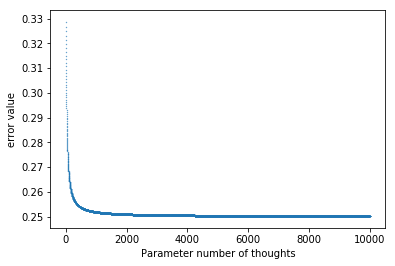

In [27]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, answer, predicted_data):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
#         self._a = self._a - self._v*2*(sum((predicted_data-answer)/len(predicted_data)*(self._a*predicted_data)*(1-predicted_data)))  # 重みパラメータ
#         self._b = self._b - self._v*2*(sum((predicted_data-answer)/len(predicted_data)*(self._b*predicted_data)*(1-predicted_data)))  # バイアス
        self._a = self._a - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(self._a*predicted_data)*(1-predicted_data))))  # 重みパラメータ
        self._b = self._b - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(self._b*predicted_data)*(1-predicted_data)))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    input_data = np.array([0, 1, 1, 0, 1, 0, 0, 1])  # 入力値
    answer_data = np.array([1, 0, 0, 1, 0, 1, 1, 0])  # 正解値
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(10000):
        if mean_squared_error is not None and mean_squared_error < 0.01:  # 誤差0.01以下になったら終わり
            # 最後のパラメータを保存
            print(a, b)
            parameter["a"].append(a)
            parameter["b"].append(b)
            break
        else:
            y = neuron.input_layer(input_data)  # 入力層
            s = neuron.activation_function(y)  # 中間層
            mean_squared_error = neuron.error_function(s, answer_data)  # 出力層　： 誤差関数

            a, b = neuron.parameter_update(answer_data, s)  # パラメータ更新
            parameter["a"].append(a)
            parameter["b"].append(b)
            
            print("mean_squared_error : ", mean_squared_error)
            error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter : ", parameter)
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=0.1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>平均 1 分散 0.5 の正規分布に従うとする。<br><br>この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>その結果について考察し、必要があれば正解率を改善せよ。

# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

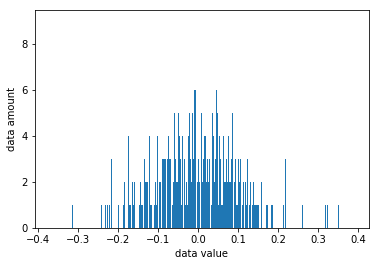

In [10]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

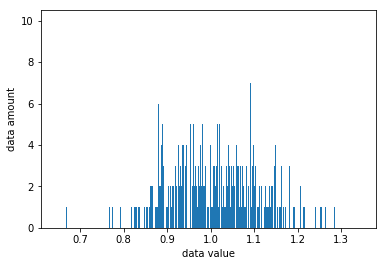

In [20]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

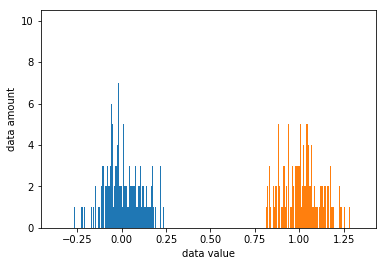

In [21]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [12]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])

### 正解データを作る

In [13]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_0, answer_1])  # 1,0配列を横に結合

In [14]:
np.set_printoptions(threshold=np.inf)
np.stack([input_data, answer],1)

array([[-3.79429158e-02,  0.00000000e+00],
       [-9.76733732e-02,  0.00000000e+00],
       [-4.56313224e-02,  0.00000000e+00],
       [ 1.26010236e-01,  0.00000000e+00],
       [-1.82977618e-02,  0.00000000e+00],
       [ 1.34731456e-02,  0.00000000e+00],
       [ 4.51197471e-02,  0.00000000e+00],
       [-5.10523464e-02,  0.00000000e+00],
       [ 2.21833317e-02,  0.00000000e+00],
       [-6.84788638e-02,  0.00000000e+00],
       [ 6.06696373e-03,  0.00000000e+00],
       [ 6.97195207e-02,  0.00000000e+00],
       [ 8.84690948e-02,  0.00000000e+00],
       [-1.25460779e-02,  0.00000000e+00],
       [-7.75710984e-02,  0.00000000e+00],
       [-3.29583823e-02,  0.00000000e+00],
       [-1.22445769e-01,  0.00000000e+00],
       [-8.34843064e-02,  0.00000000e+00],
       [-1.33400551e-01,  0.00000000e+00],
       [-2.67471474e-03,  0.00000000e+00],
       [-1.74210367e-01,  0.00000000e+00],
       [-7.40538990e-02,  0.00000000e+00],
       [-6.46345465e-02,  0.00000000e+00],
       [ 2.

## 解答パターン1  (乱数をそのまま利用している)

mean_squared_error :  0.2668609496503227
mean_squared_error :  0.2753915814492692
mean_squared_error :  0.2426049141468347
mean_squared_error :  0.21588833043337896
mean_squared_error :  0.25463532695831026
mean_squared_error :  0.28600710644177924
mean_squared_error :  0.23718873009849725
mean_squared_error :  0.31246811647319916
mean_squared_error :  0.23524531043881908
mean_squared_error :  0.20793220444778754
mean_squared_error :  0.20231079442926406
mean_squared_error :  0.29024111801970753
mean_squared_error :  0.2990528771570108
mean_squared_error :  0.3709228625281194
mean_squared_error :  0.2393764553317224
mean_squared_error :  0.23718342094357087
mean_squared_error :  0.24027227150216854
mean_squared_error :  0.21151420993895725
mean_squared_error :  0.3166656588858515
mean_squared_error :  0.20957547366499038
mean_squared_error :  0.31970153093761283
mean_squared_error :  0.2096675268370916
mean_squared_error :  0.2564853060823257
mean_squared_error :  0.25556121733275183
m

mean_squared_error :  0.2387734652808743
mean_squared_error :  0.23509388009831592
mean_squared_error :  0.2361984298487461
mean_squared_error :  0.23458648848355584
mean_squared_error :  0.23717864780917608
mean_squared_error :  0.23959776852294226
mean_squared_error :  0.2409169981677496
mean_squared_error :  0.2397293390063778
mean_squared_error :  0.24240413314565185
mean_squared_error :  0.24124473767327703
mean_squared_error :  0.23828659485006673
mean_squared_error :  0.23760990755447406
mean_squared_error :  0.24320778992591377
mean_squared_error :  0.23530393729034982
mean_squared_error :  0.238274027460361
mean_squared_error :  0.23729792717594286
mean_squared_error :  0.23792425307831463
mean_squared_error :  0.24274974592593884
mean_squared_error :  0.23928182867520112
mean_squared_error :  0.2368643745841174
mean_squared_error :  0.24217326581669596
mean_squared_error :  0.23883994321475815
mean_squared_error :  0.24282939761430353
mean_squared_error :  0.23846590916451427

mean_squared_error :  0.24153834944301256
mean_squared_error :  0.2473252865451298
mean_squared_error :  0.24122200856769255
mean_squared_error :  0.24855236067640377
mean_squared_error :  0.24074931793434926
mean_squared_error :  0.24282037714404378
mean_squared_error :  0.24154819282875556
mean_squared_error :  0.24270168142343082
mean_squared_error :  0.24402954533275398
mean_squared_error :  0.24061805350628374
mean_squared_error :  0.24480884502266623
mean_squared_error :  0.2408119794847582
mean_squared_error :  0.24116735839413878
mean_squared_error :  0.24214486932960194
mean_squared_error :  0.24197071593970826
mean_squared_error :  0.24111087761256644
mean_squared_error :  0.24195233778039646
mean_squared_error :  0.24214858938381195
mean_squared_error :  0.24105982353493569
mean_squared_error :  0.2425426155408416
mean_squared_error :  0.24129496352104238
mean_squared_error :  0.2420366320435444
mean_squared_error :  0.2411985854432296
mean_squared_error :  0.242282832114314

mean_squared_error :  0.24435758158116413
mean_squared_error :  0.24352541651695372
mean_squared_error :  0.24519528908869137
mean_squared_error :  0.24378619601531576
mean_squared_error :  0.2460263056751411
mean_squared_error :  0.24406799644419666
mean_squared_error :  0.2444405892553109
mean_squared_error :  0.24406773150780736
mean_squared_error :  0.24476218633690208
mean_squared_error :  0.24394222100166038
mean_squared_error :  0.24378392741302865
mean_squared_error :  0.24398126851646612
mean_squared_error :  0.24374101023030184
mean_squared_error :  0.2438643587881906
mean_squared_error :  0.2443915810085654
mean_squared_error :  0.24482091396769956
mean_squared_error :  0.24465357332871107
mean_squared_error :  0.24481932725015082
mean_squared_error :  0.24458601474981806
mean_squared_error :  0.2449483450589923
mean_squared_error :  0.24400885558052304
mean_squared_error :  0.24387643058822858
mean_squared_error :  0.2442691742309164
mean_squared_error :  0.2440104129079546

mean_squared_error :  0.24591747193886357
mean_squared_error :  0.24572538022919457
mean_squared_error :  0.2470498901343622
mean_squared_error :  0.24499076876858852
mean_squared_error :  0.24597014004160023
mean_squared_error :  0.24497576546027708
mean_squared_error :  0.24502253698634358
mean_squared_error :  0.24552143705897084
mean_squared_error :  0.24552745270918114
mean_squared_error :  0.2451724351833695
mean_squared_error :  0.24565723970048325
mean_squared_error :  0.24578154814271724
mean_squared_error :  0.2458068214903255
mean_squared_error :  0.24595194200559972
mean_squared_error :  0.24525291847507252
mean_squared_error :  0.24534252061893339
mean_squared_error :  0.24577551370913533
mean_squared_error :  0.24572424367794857
mean_squared_error :  0.24510685011043443
mean_squared_error :  0.24561768172998186
mean_squared_error :  0.24544627662847265
mean_squared_error :  0.24508401557500564
mean_squared_error :  0.24543258096843748
mean_squared_error :  0.2455623233003

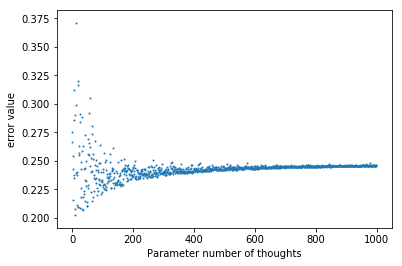

In [15]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        if np.where(x == 0):
            x = x + np.random.normal(0, 0.5) # 平均0, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b 
        if np.where(x == 1):
            x = x + np.random.normal(1, math.sqrt(0.5)) # 平均1, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, answer, predicted_data):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*2*(sum((predicted_data-answer)/len(predicted_data)*(self._a*predicted_data)*(1-predicted_data)))  # 重みパラメータ
        self._b = self._b - self._v*2*(sum((predicted_data-answer)/len(predicted_data)*(self._b*predicted_data)*(1-predicted_data)))  # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] は次の様に用意[array([-0.65254759,  0.63492252,  0.32712462, ...,  3.54405229, 0.42009267,  2.46580509]) , array([0., 1., 0., ..., 1., 0., 1.])]この形にする
    np.random.shuffle(data)   # シャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        mean_squared_error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,1], s)  # パラメータ更新
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("mean_squared_error : ", mean_squared_error)
        error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()
    


## 解答パターン2 (予測結果(出力値)10回づつをまとめた平均でパラメータ更新)

In [9]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        if np.where(x == 0):
            x = x + np.random.normal(0, 0.5) # 平均0, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b 
        if np.where(x == 1):
            x = x + np.random.normal(1, math.sqrt(0.5)) # 平均1, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum(s - answer)**2/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, ten_times_error, ten_times_output):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
        print("ten_times_error : ", ten_times_error)
        print("ten_times_output : ", ten_times_output)
        self._a = self._a - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._a*ten_times_output)*(1-ten_times_output)))  # 重みパラメータ
        self._b = self._b - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._b*ten_times_output)*(1-ten_times_output)))  # バイアス
        return self._a, self._b    


if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] は次の様に用意[array([-0.65254759,  0.63492252,  0.32712462, ...,  3.54405229, 0.42009267,  2.46580509]) , array([0., 1., 0., ..., 1., 0., 1.])]この形にする
    np.random.shuffle(data)   # シャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}
    ten_times_error = []  # 10回分の誤差保存用
    ten_times_output = []  # 10回分の出力保存用
    
    for j in range(1000):
        if  j == 0 or j%10 != 0:  
            y = neuron.input_layer(data[:,0])  # 入力層
            s = neuron.activation_function(y)  # 中間層
            ten_times_output.append(s)
            ten_times_error.append(neuron.error_function(s, data[:,1]))  # 出力層　： 誤差関数
            print("ten_times_error : ", ten_times_error)
        else:
            # 10回分の誤差の平均をupdate(誤差平均)
            ten_times_error = ten_times_error[0]/10
            print("else : ", ten_times_error/len(ten_times_output))
            print("else : ", type(ten_times_error))    
            print("ten_times_output : ", len(ten_times_output)+1)
            a, b = neuron.parameter_update(ten_times_error, ten_times_output)  # パラメータ更新
            parameter["a"].append(a)
            parameter["b"].append(b)
            ten_times_error = []  # 10回分の誤差保存用
            ten_times_output = []  # 10回分の出力保存用

            print("mean_squared_error : ", mean_squared_error)
            error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("error_list: ", error_list)
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()
    


ten_times_error :  [7.141125152722042]
ten_times_error :  [7.141125152722042, 549.3706740884729]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788, 1400.2229290893754]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788, 1400.2229290893754, 59.10330675916155]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788, 1400.2229290893754, 59.10330675916155, 1520.327263583375]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788, 1400.2229290893754, 59.10330675916155, 1520.327263583375, 699.8871825577413]
ten_times_error :  [7.141125152722042, 549.3706740884729, 1061.5521966827657, 459.7321932333788, 1400.2229290893754, 59.10330675916155, 1520.32726

TypeError: can't multiply sequence by non-int of type 'float'